### Question 
Market Basket Analysis: Apriori Algorithm <br>
Dataset: Order2.csv <br>
This dataset comprises the list of transactions of a retail company over the
period of one week. <br>
It contains a total of 7501 transaction records where each record consists of the list of items sold in one transaction. <br>
Using this record of transactions and items in each transaction, find the association rules between
items. <br>
There is no header in the dataset and the first row contains the first transaction,
so mentioned header = None here while loading dataset. Follow following
steps: <br>
1. Data Pre-processing
2. Generate the list of transactions from the dataset
3. Train Apriori algorithm on the dataset
4. Visualize the list of rules

In [1]:
# Import necessary libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
# Load the dataset
df = pd.read_csv('Order2.csv', header=None)

In [3]:
# Data Pre-processing
transactions = []
for row in df.values:
    transactions.append([str(item).strip() for item in row if pd.notna(item)])

# Perform one-hot encoding
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [4]:
# Train Apriori on the dataset
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)

In [5]:
# Display frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets.head(5))

# Display association rules
print("\nAssociation Rules:")
print(rules.head(5))

Frequent Itemsets:
    support          itemsets
0  0.020397         (almonds)
1  0.033329         (avocado)
2  0.010799  (barbecue sauce)
3  0.014265       (black tea)
4  0.011465      (body spray)

Association Rules:
  antecedents      consequents  antecedent support  consequent support  \
0   (avocado)  (mineral water)            0.033329            0.238368   
1   (burgers)           (eggs)            0.087188            0.179709   
2   (burgers)   (french fries)            0.087188            0.170911   
3   (burgers)      (green tea)            0.087188            0.132116   
4   (burgers)           (milk)            0.087188            0.129583   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.011598    0.348000  1.459926  0.003654    1.168147       0.325896  
1  0.028796    0.330275  1.837830  0.013128    1.224818       0.499424  
2  0.021997    0.252294  1.476173  0.007096    1.108844       0.353384  
3  0.017464    0.200306  1.516139  0.005945 

### The Following Code is Optional

## Optional Rules Printing

In [6]:
# Print simplified association rules
for i, row in rules.iterrows():
    antecedents = ', '.join(row['antecedents'])
    consequents = ', '.join(row['consequents'])
    support = row['support']
    confidence = row['confidence']
    lift = row['lift']

    print(f"Rule {i + 1}:")
    print(f"Antecedents: {antecedents}")
    print(f"Consequents: {consequents}")
    print(f"Support: {support:.4f}")
    print(f"Confidence: {confidence:.4f}")
    print(f"Lift: {lift:.4f}")
    print("=" * 30)


Rule 1:
Antecedents: avocado
Consequents: mineral water
Support: 0.0116
Confidence: 0.3480
Lift: 1.4599
Rule 2:
Antecedents: burgers
Consequents: eggs
Support: 0.0288
Confidence: 0.3303
Lift: 1.8378
Rule 3:
Antecedents: burgers
Consequents: french fries
Support: 0.0220
Confidence: 0.2523
Lift: 1.4762
Rule 4:
Antecedents: burgers
Consequents: green tea
Support: 0.0175
Confidence: 0.2003
Lift: 1.5161
Rule 5:
Antecedents: burgers
Consequents: milk
Support: 0.0179
Confidence: 0.2049
Lift: 1.5812
Rule 6:
Antecedents: burgers
Consequents: mineral water
Support: 0.0244
Confidence: 0.2798
Lift: 1.1739
Rule 7:
Antecedents: burgers
Consequents: spaghetti
Support: 0.0215
Confidence: 0.2462
Lift: 1.4139
Rule 8:
Antecedents: cake
Consequents: eggs
Support: 0.0191
Confidence: 0.2352
Lift: 1.3088
Rule 9:
Antecedents: cake
Consequents: french fries
Support: 0.0179
Confidence: 0.2204
Lift: 1.2895
Rule 10:
Antecedents: cake
Consequents: mineral water
Support: 0.0275
Confidence: 0.3388
Lift: 1.4214
Rule 

## Optional Visualization

c:\Users\shaur\anaconda3\Lib\site-packages\networkx\drawing\nx_pylab.py:304: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  draw_networkx_edges(G, pos, arrows=arrows, **edge_kwds)


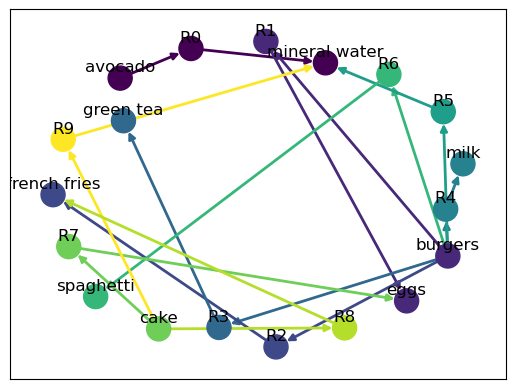

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_graph(rules, rules_to_show):
    G1 = nx.DiGraph()

    color_map = []
    N = 50
    colors = range(N)
    strs = [f'R{i}' for i in range(rules_to_show)]

    for i in range(rules_to_show):
        rule_name = f'R{i}'
        G1.add_node(rule_name)
        
        for a in rules.iloc[i]['antecedents']:
            G1.add_node(a)
            G1.add_edge(a, rule_name, color=colors[i], weight=2)
            
        for c in rules.iloc[i]['consequents']:
            G1.add_node(c)
            G1.add_edge(rule_name, c, color=colors[i], weight=2)
            
        color_map.extend([colors[i]] * (len(G1.nodes) - len(color_map)))

    edges = G1.edges()
    edge_colors = [G1[u][v]['color'] for u, v in edges]
    edge_weights = [G1[u][v]['weight'] for u, v in edges]

    pos = nx.spring_layout(G1, k=16, scale=1)
    nx.draw_networkx(G1, pos, edgelist=edges, edge_color=edge_colors, width=edge_weights, font_size=10, with_labels=False, node_color=color_map)

    for p in pos:
        pos[p][1] += 0.07
    nx.draw_networkx_labels(G1, pos)
    plt.show()

draw_graph(rules, 10)